## 配对交易策略 Pair Trading

In [1]:
import pandas as pd
import numpy as np
import tushare as ts
import seaborn
%matplotlib inline
from matplotlib import pyplot as plt
stocks_pair = ['600199', '600702']

### 1. 数据准备 & 回测准备

In [2]:
data1 = ts.get_k_data('600199', '2013-06-01', '2014-12-31')[['date','close']]
data1.head()

,date,close
96,2013-06-03,15.480
97,2013-06-04,14.856
98,2013-06-05,15.019
99,2013-06-06,14.645
100,2013-06-07,14.222


In [3]:
data2 = ts.get_k_data('600702', '2013-06-01', '2014-12-31')['close']
data2.head()

96     17.320
97     16.930
98     17.144
99     16.843
100    16.609
Name: close, dtype: float64

In [4]:
data = pd.concat([data1, data2], axis=1)                 #拼接，把两张表格的数据拼接起来；
data.head()

,date,close,close
96,2013-06-03,15.480,17.320
97,2013-06-04,14.856,16.930
98,2013-06-05,15.019,17.144
99,2013-06-06,14.645,16.843
100,2013-06-07,14.222,16.609


In [5]:
data.set_index('date',inplace = True)
data.columns = stocks_pair
data.head()

,600199,600702
date,,
2013-06-03,15.480,17.320
2013-06-04,14.856,16.930
2013-06-05,15.019,17.144
2013-06-06,14.645,16.843
2013-06-07,14.222,16.609


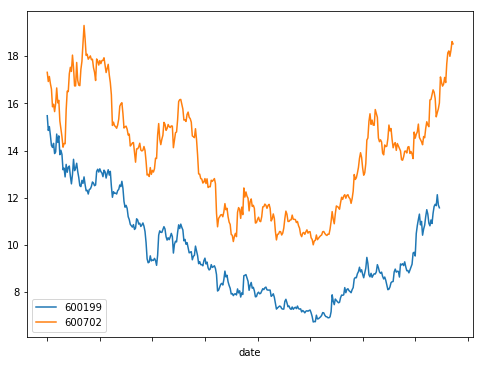

In [6]:
data.plot(figsize= (8,6))

### 2. 策略开发思路

In [7]:
# data['pair_ratio'] =data[stocks_pair[0]]/data[stocks_pair[1]]
# mean = data['pair_ratio'].mean()
# std = data['pair_ratio'].std()
# data['ratio_mean'] = mean
# data['ratio_ceiling'] = mean + std
# data['ratio_floor'] = mean - std

In [8]:
data['priceDelta']=data['600199']-data['600702']

In [9]:
data.head()

,600199,600702,priceDelta
date,,,
2013-06-03,15.480,17.320,-1.840
2013-06-04,14.856,16.930,-2.074
2013-06-05,15.019,17.144,-2.125
2013-06-06,14.645,16.843,-2.198
2013-06-07,14.222,16.609,-2.387


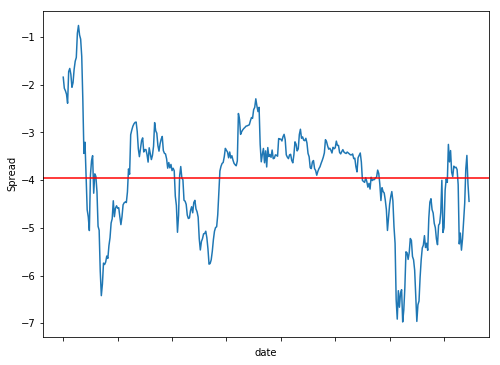

In [27]:
data['priceDelta'].plot(figsize= (8,6))
plt.ylabel('Spread')
plt.axhline(data['priceDelta'].mean(), color='r')

In [11]:
data['zscore'] = (data['priceDelta'] - np.mean(data['priceDelta']))/np.std(data['priceDelta'])     #价差的标准化；

In [12]:
data.head(20)

,600199,600702,priceDelta,zscore
date,,,,
2013-06-03,15.480,17.320,-1.840,1.962060
2013-06-04,14.856,16.930,-2.074,1.745803
2013-06-05,15.019,17.144,-2.125,1.698670
2013-06-06,14.645,16.843,-2.198,1.631205
2013-06-07,14.222,16.609,-2.387,1.456536
2013-06-13,14.136,15.859,-1.723,2.070189
2013-06-14,14.309,15.966,-1.657,2.131184
2013-06-17,13.876,15.655,-1.779,2.018435
2013-06-18,13.944,15.996,-2.052,1.766135


In [13]:
data[data['zscore'] < - 1.5].head()

,600199,600702,priceDelta,zscore
date,,,,
2013-07-24,12.611,18.512,-5.901,-1.791018
2013-07-25,12.886,19.307,-6.421,-2.271590
2013-07-26,12.562,18.741,-6.179,-2.047939
2013-07-29,12.297,18.036,-5.739,-1.641302
2013-07-30,12.317,18.086,-5.769,-1.669027


In [14]:
len(data[data['zscore'] < - 1.5])

30

In [15]:
data['position_1'] = np.where(data['zscore'] > 1.5, -1, np.nan)
data['position_1'] = np.where(data['zscore'] < -1.5, 1, data['position_1'])
data['position_1'] = np.where(abs(data['zscore']) < 0.5, 0, data['position_1'])

In [16]:
data.head(50)

,600199,600702,priceDelta,zscore,position_1
date,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0
2013-06-07,14.222,16.609,-2.387,1.456536,NaN
2013-06-13,14.136,15.859,-1.723,2.070189,-1.0
2013-06-14,14.309,15.966,-1.657,2.131184,-1.0
2013-06-17,13.876,15.655,-1.779,2.018435,-1.0
2013-06-18,13.944,15.996,-2.052,1.766135,-1.0


#### 产生交易信号

In [17]:
data['position_1'] = data['position_1'].fillna(method = 'ffill')

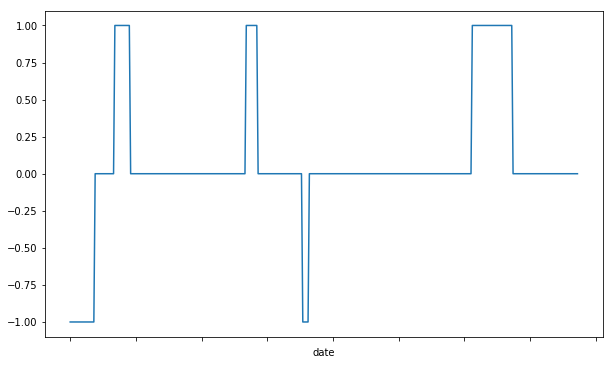

In [18]:
data['position_1'].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

In [19]:
data['position_2'] = -np.sign(data['position_1'])

In [20]:
data.head(20)

,600199,600702,priceDelta,zscore,position_1,position_2
date,,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0,1.0
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0,1.0
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0,1.0
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0,1.0
2013-06-07,14.222,16.609,-2.387,1.456536,-1.0,1.0
2013-06-13,14.136,15.859,-1.723,2.070189,-1.0,1.0
2013-06-14,14.309,15.966,-1.657,2.131184,-1.0,1.0
2013-06-17,13.876,15.655,-1.779,2.018435,-1.0,1.0
2013-06-18,13.944,15.996,-2.052,1.766135,-1.0,1.0


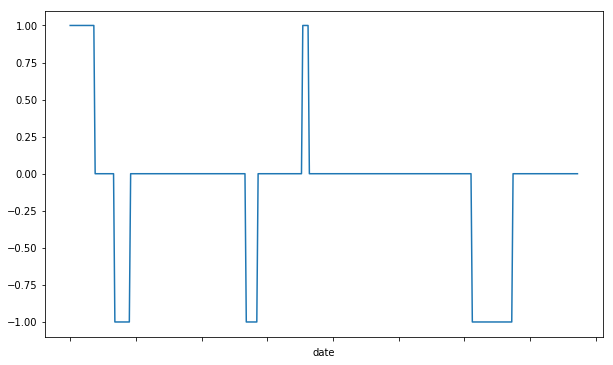

In [21]:
data['position_2'].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

### 3. 计算策略年化收益并可视化

In [22]:
data['returns_1'] = np.log(data['600199'] / data['600199'].shift(1))

In [23]:
data['returns_2'] = np.log(data['600702'] / data['600702'].shift(1))

In [24]:
data.head(20)

,600199,600702,priceDelta,zscore,position_1,position_2,returns_1,returns_2
date,,,,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0,1.0,NaN,NaN
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0,1.0,-0.041145,-0.022775
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0,1.0,0.010912,0.012561
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0,1.0,-0.025217,-0.017713
2013-06-07,14.222,16.609,-2.387,1.456536,-1.0,1.0,-0.029309,-0.013990
2013-06-13,14.136,15.859,-1.723,2.070189,-1.0,1.0,-0.006065,-0.046208
2013-06-14,14.309,15.966,-1.657,2.131184,-1.0,1.0,0.012164,0.006724
2013-06-17,13.876,15.655,-1.779,2.018435,-1.0,1.0,-0.030728,-0.019671
2013-06-18,13.944,15.996,-2.052,1.766135,-1.0,1.0,0.004889,0.021548


In [25]:
data['strategy'] = 0.5*(data['position_1'].shift(1) * data['returns_1'])+0.5*(data['position_2'].shift(1) * data['returns_2'])

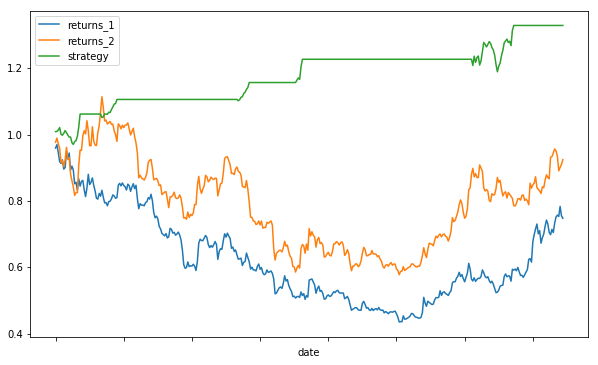

In [26]:
data[['returns_1','returns_2','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

声明：本资料仅限内部研究和交流使用，切勿外传。